In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users\monster\Desktop/NonLinearRegressionModels\RandomForest\Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [4]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
gbm_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [6]:
gbm_params = {"learning_rate": [0.001, 0.1, 0.01], "max_depth": [3, 5, 8], "n_estimators": [100, 200, 500],
             "subsample": [1, 0.5, 0.8], "loss": ["ls", "lad", "quantile"]}

In [7]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  3.2min finished


In [8]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.5}

In [9]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1, loss = "ls", max_depth = 3, n_estimators = 200, subsample = 0.5
                                     ).fit(X_train, y_train)

In [11]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

323.022982314373

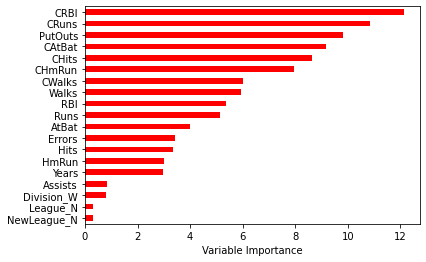

In [13]:
Importance = pd.DataFrame({'Importance': gbm_tuned.feature_importances_*100}, index = X_train.columns)

Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r',)

plt.xlabel('Variable Importance')
plt.gca().legend_ = None